# Project Overview

Data science is a popular career nowadays. So why not understand the role better? 

With the power of ML and powerful Python libaries we take a deep dive into understanding a lot of our questions.

# Libaries

In [ ]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

# Import Data

In [ ]:
jobs_df = pd.read_csv(r'C:\Users\kazir\OneDrive\Desktop\Github\Data_Science\DS_JOBS\CSVs\DS_jobs_03182023.csv')

# Data Exploration

In [ ]:
jobs_df.head(3)

In [ ]:
jobs_df.isnull().sum()

In [ ]:
jobs_df.columns

In [ ]:
jobs_df['company_perks'].value_counts()

In [ ]:
jobs_df['hybrid'].value_counts()

## Data Cleaning

### Drop Columns

In [ ]:
jobs_df[['id', 'company_id']][:2]

In [ ]:
columns = [column for column in jobs_df.columns if len(jobs_df[column].value_counts())<=1]
columns.append('id')
jobs_df.drop(columns=columns, inplace=True)

In [ ]:
jobs_df.head(2)

In [ ]:
jobs_df.columns

### Updated DataFrame

In [ ]:
jobs_df_updated = jobs_df[['job_title', 'company_id', 'title', 'locations', 'body', 'company_size' ,'experience_level',
                        'job_id', 'location','original_location', 'salary_max', 'salary_min', 'salary_single_value',
                        'sort_job', 'working_option']]

In [ ]:
jobs_df_updated.head(5)

### Dropping Duplicates

We do not want the same jobs in our data being repeated.

In [ ]:
jobs_df[jobs_df['job_id'].duplicated()]['job_id']

In [ ]:
jobs_df[jobs_df.job_id==2644317]

In [62]:
jobs_df.drop_duplicates(inplace=True)
jobs_df.reset_index(drop=True, inplace=True)
jobs_df.head(3)

,alias,elite,high_volume_poster,limited_listing,locations,premium,title,total_employees,job_alias,body,...,original_location,remote,remote_status,salary_max,salary_min,salary_single_value,sort_job,targeted_remote_locations,job_title,working_option
0,/company/warner-bros-discovery,True,True,False,"['Chicago', 'Colorado', 'Los Angeles', 'Austin...",False,Warner Bros. Discovery,0,/job/data/sr-data-engineer/1656826,"Every great story has a new beginning, and you...",...,SEATTLE,NOT_REMOTE,NOT_REMOTE,182013.0,98007.0,0.0,2023-03-17 23:39:40,NaN,Sr. Data Engineer,['IN-OFFICE']
1,/company/dish,True,False,False,NaN,False,DISH,14500,/job/data/sr-data-engineer/1656827,"Every great story has a new beginning, and you...",...,SEATTLE,NOT_REMOTE,NOT_REMOTE,182013.0,98007.0,0.0,2023-03-17 23:39:42,NaN,Sr. Data Engineer,['IN-OFFICE']
2,/company/chewy,True,True,False,"['Austin', 'Boston', 'Seattle', 'Baltimore', '...",False,Chewy,20000,/job/data/business-intelligence-engineer/1630873,Our Opportunity:Chewy is looking for a Busines...,...,"Boston, MA",NOT_REMOTE,NOT_REMOTE,0.0,0.0,0.0,2023-03-18 05:56:18,NaN,Business Intelligence Engineer,['IN-OFFICE']


# Data Information

1. Which company has the most Data Science jobs open?
2. Which location offers the most Data Science job?
3. What is the minimum and maximum pay of a Data Science role from the given data?

In [63]:
jobs_df_updated['title'].value_counts()[:5]

Capital One               188
JPMorgan Chase            137
Chewy                      79
City National Bank         59
Warner Bros. Discovery     52
Name: title, dtype: int64

In [64]:
jobs_df_updated['location'].value_counts()[:5]

Remote               1364
New York City, NY     653
Other US Location     572
Chicago, IL           415
Washington DC         366
Name: location, dtype: int64

In [65]:
print (f"The minimum pay in the data is ${jobs_df_updated['salary_min'].min()}")
print (f"The max pay in the data is ${jobs_df_updated['salary_max'].max()}")

The minimum pay in the data is $0.0
The max pay in the data is $456000.0


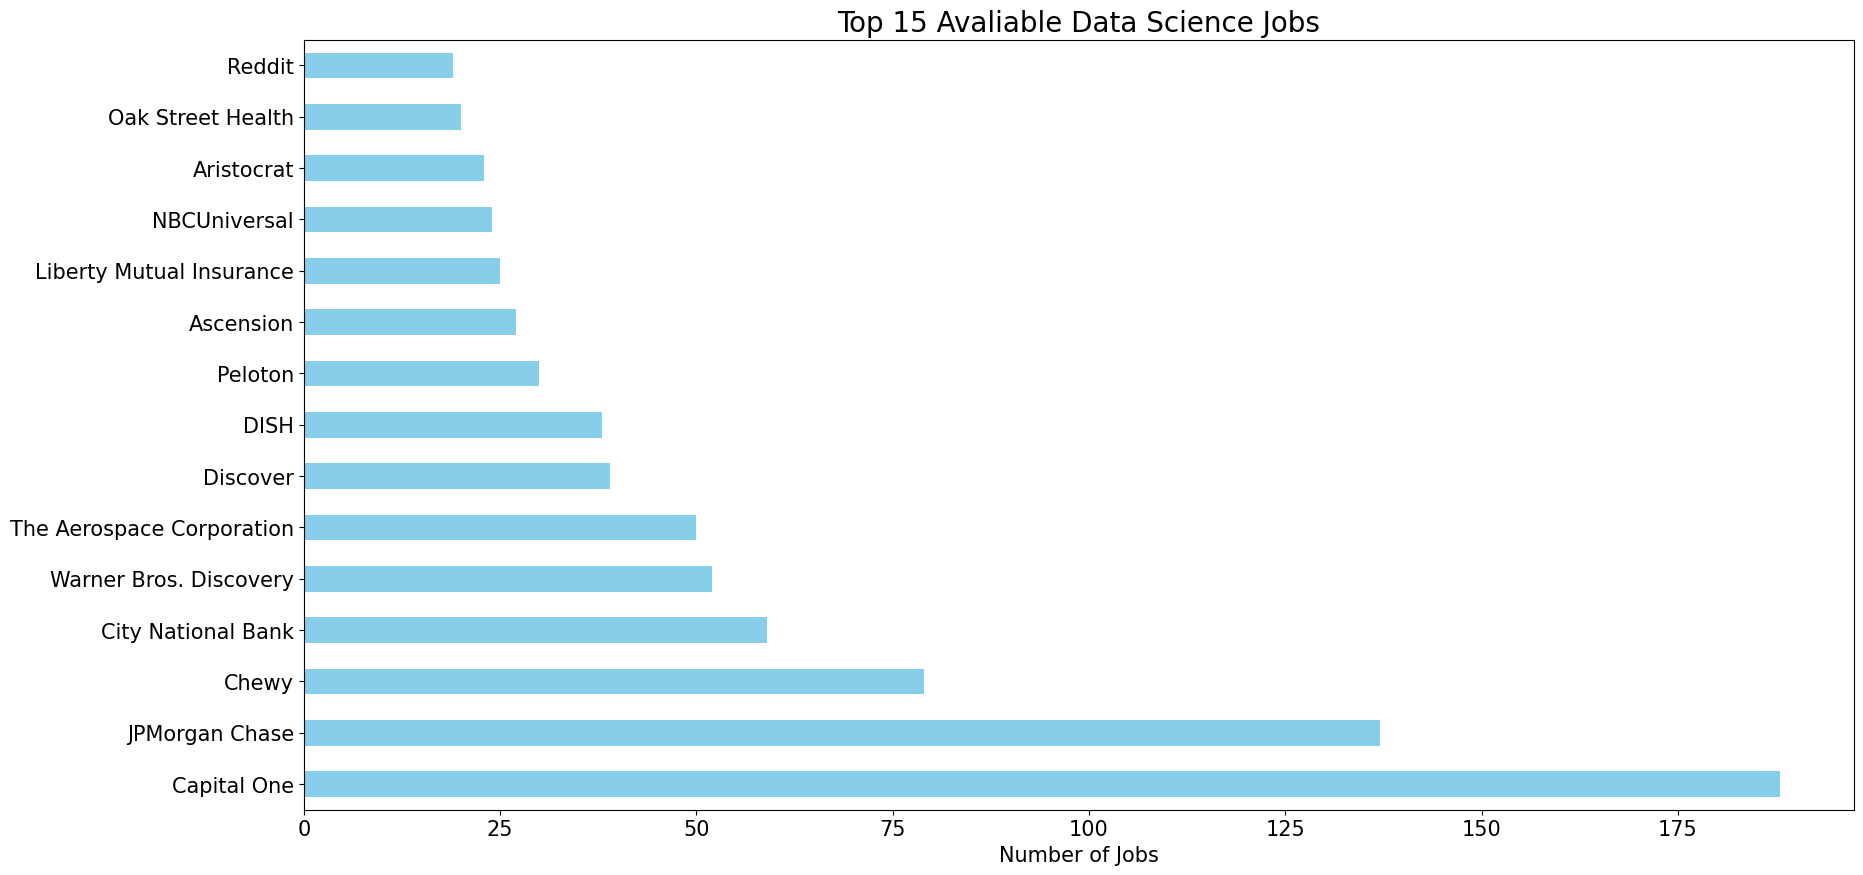

In [66]:
avaliable_jobs = pd.DataFrame(jobs_df_updated['title'].value_counts()[:15])
avaliable_jobs.rename(columns={"title":"count"}, inplace=True)

# Creating a bar graph
plt.figure(figsize=(20, 10))
avaliable_jobs['count'].plot(kind='barh', color='skyblue', fontsize=15)
plt.title('Top 15 Avaliable Data Science Jobs', fontsize=20)
plt.xlabel('Number of Jobs', fontsize=15)
plt.show()

# Sentiment Score

Understanding the sentiment score of each job description using NLTK

In [67]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [68]:
job_information = jobs_df[['company_id','job_id', 'title', 'job_title', 'body']]
def polarity_scores(data):
    scores = sia.polarity_scores(data)
    return scores

scores = job_information['body'].apply(polarity_scores)
sentiment_df = pd.DataFrame.from_records(scores)

In [69]:
sentiment_df.reset_index().rename(columns={"index":"id"}, inplace=True)
sentiment_df = sentiment_df.join(job_information)

In [70]:
sentiment_df.query("compound < 0")

,neg,neu,pos,compound,company_id,job_id,title,job_title,body
326,0.068,0.849,0.084,-0.0314,63878,1720867,GRAIL,Bioinformatics Scientist (Multiomics Research)...,GRAIL is a healthcare company whose mission is...
2161,0.086,0.839,0.076,-0.0772,84752,2354838,VyStar Credit Union,Senior Enterprise Risk Management Analyst,"At VyStar, we offer competitive pay, an excell..."
2907,0.087,0.849,0.065,-0.8939,84036,1947538,Hancock Whitney,BSA Analyst,Thank you for your interest in our company! To...
2909,0.079,0.855,0.066,-0.6731,84036,1989401,Hancock Whitney,BSA Analyst,Thank you for your interest in our company! To...
3893,0.148,0.730,0.122,-0.6908,84977,2628757,First Citizens Bank,"First Line Risk Analyst, Treasury -Balance She...",Overview This position is responsible for as...


# Text Mining
We want to understand the skills a lot of the companies look for in a Data Scientist, and how some of the jobs are related to one another based on their descriptions.

## Importing Libaries for Text Mining

In [71]:
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
jobs_df.columns

Index(['alias', 'elite', 'high_volume_poster', 'limited_listing', 'locations',
       'premium', 'title', 'total_employees', 'job_alias', 'body',
       'company_id', 'company_size', 'easy_apply', 'experience_level',
       'how_to_apply', 'hybrid', 'job_id', 'industry_id', 'location',
       'original_location', 'remote', 'remote_status', 'salary_max',
       'salary_min', 'salary_single_value', 'sort_job',
       'targeted_remote_locations', 'job_title', 'working_option'],
      dtype='object')

In [73]:
job_information = jobs_df[['company_id','job_id', 'title', 'job_title', 'body']]
job_information.head()

,company_id,job_id,title,job_title,body
0,64944,2675580,Warner Bros. Discovery,Sr. Data Engineer,"Every great story has a new beginning, and you..."
1,64944,2675581,DISH,Sr. Data Engineer,"Every great story has a new beginning, and you..."
2,64894,2644318,Chewy,Business Intelligence Engineer,Our Opportunity:Chewy is looking for a Busines...
3,64453,2677947,Reddit,"Staff Data Scientist, Ads Experimentation Anal...",Reddit is a community of communities where peo...
4,81846,2715266,Capital One,Senior Data Engineer,"Locations: VA - McLean, United States of Ameri..."


In [74]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
snowball_stemer = nltk.SnowballStemmer(language="english")
stop_words = nltk.corpus.stopwords.words('English')
def cleaning_desc (des):
    text = "".join([t for t in des if t not in string.punctuation])
    text_split = re.split(r'\W+', text)
    text_not_in_stop_words = [t for t in text_split if t not in stop_words]
    final_text = [snowball_stemer.stem(word) for word in text_not_in_stop_words]
    return final_text

In [76]:
job_information['clean_body'] = job_information['body'].apply(cleaning_desc)

In [77]:
job_information

,company_id,job_id,title,job_title,body,clean_body
0,64944,2675580,Warner Bros. Discovery,Sr. Data Engineer,"Every great story has a new beginning, and you...","[everi, great, stori, new, begin, start, herew..."
1,64944,2675581,DISH,Sr. Data Engineer,"Every great story has a new beginning, and you...","[everi, great, stori, new, begin, start, herew..."
2,64894,2644318,Chewy,Business Intelligence Engineer,Our Opportunity:Chewy is looking for a Busines...,"[our, opportunitychewi, look, busi, intellig, ..."
3,64453,2677947,Reddit,"Staff Data Scientist, Ads Experimentation Anal...",Reddit is a community of communities where peo...,"[reddit, communiti, communiti, peopl, dive, an..."
4,81846,2715266,Capital One,Senior Data Engineer,"Locations: VA - McLean, United States of Ameri...","[locat, va, mclean, unit, state, america, mcle..."
...,...,...,...,...,...,...
5691,98020,2412424,DeepScribe,Data Scientist,"Our MissionAt DeepScribe, everything we do is ...","[our, missionat, deepscrib, everyth, focus, mi..."
5692,86596,2327537,Icertis,Senior Data Scientist - NLP - Remote,With unmatched technology and category-definin...,"[with, unmatch, technolog, categorydefin, inno..."
5693,86596,2327535,Icertis,Principal Data Scientist - NLP - Remote,With unmatched technology and category-definin...,"[with, unmatch, technolog, categorydefin, inno..."
5694,89050,2267029,Bottomline Technologies,Matching Specialist,Bottomline is at the forefront of digital tran...,"[bottomlin, forefront, digit, transform, we, g..."


In [78]:
print ("The length of the first job desc was {} and now the length is {}." \
    .format(len(job_information.loc[0]['body']), len(job_information.loc[0]['clean_body'])))

The length of the first job desc was 6607 and now the length is 615.


## NLTK

Using sentdex playlist to transform the job descriptions.

NLTK does not do real analysis, it is a toolkit to process text data.

In [79]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [80]:
example_text = job_information.loc[0]['body']
example_text

'Every great story has a new beginning, and yours starts here.Welcome to Warner Bros. Discovery... the stuff dreams are made of.Who We Are... When we say, "the stuff dreams are made of," we\'re not just referring to the world of wizards, dragons and superheroes, or even to the wonders of Planet Earth. Behind WBD\'s vast portfolio of iconic content and beloved brands, are the storytellers bringing our characters to life, the creators bringing them to your living rooms and the dreamers creating what\'s next...From brilliant creatives, to technology trailblazers, across the globe, WBD offers career defining opportunities, thoughtfully curated benefits, and the tools to explore and grow into your best selves. Here you are supported, here you are celebrated, here you can thrive.Every great story has a new beginning. We\'re excited to announce that Discovery and WarnerMedia have combined to become Warner Bros. Discovery. WBD is a premier global media and entertainment company offering audien

In [81]:
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Stop Words

In [82]:
# Setting up the cleaning process
stop_words = stop_words
punc = string.punctuation

In [83]:
clean_split = re.split("\W+", example_text)
filtered_body = [w.strip().lower() for w in clean_split if w not in stop_words]
punc_remove = [b for b in filtered_body if b not in punc]
print (punc_remove)

['every', 'great', 'story', 'new', 'beginning', 'starts', 'welcome', 'warner', 'bros', 'discovery', 'stuff', 'dreams', 'made', 'who', 'we', 'are', 'when', 'say', 'stuff', 'dreams', 'made', 'referring', 'world', 'wizards', 'dragons', 'superheroes', 'even', 'wonders', 'planet', 'earth', 'behind', 'wbd', 'vast', 'portfolio', 'iconic', 'content', 'beloved', 'brands', 'storytellers', 'bringing', 'characters', 'life', 'creators', 'bringing', 'living', 'rooms', 'dreamers', 'creating', 'next', 'from', 'brilliant', 'creatives', 'technology', 'trailblazers', 'across', 'globe', 'wbd', 'offers', 'career', 'defining', 'opportunities', 'thoughtfully', 'curated', 'benefits', 'tools', 'explore', 'grow', 'best', 'selves', 'here', 'supported', 'celebrated', 'thrive', 'every', 'great', 'story', 'new', 'beginning', 'we', 'excited', 'announce', 'discovery', 'warnermedia', 'combined', 'become', 'warner', 'bros', 'discovery', 'wbd', 'premier', 'global', 'media', 'entertainment', 'company', 'offering', 'audie

In [98]:
def cleaning_body(text):
    clean_split = re.split("\W+", text)
    filtered_body = [w.strip().lower() for w in clean_split if w not in stop_words]
    punc_remove = " ".join([b for b in filtered_body if b not in punc])
    return punc_remove

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
job_information.drop(columns='clean_body', inplace=True)

In [99]:
job_information['clean_desc'] = job_information['body'].apply(lambda x: cleaning_body(x))
job_information.head()

,company_id,job_id,title,job_title,body,clean_desc
0,64944,2675580,Warner Bros. Discovery,Sr. Data Engineer,"Every great story has a new beginning, and you...",every great story new beginning starts welcome...
1,64944,2675581,DISH,Sr. Data Engineer,"Every great story has a new beginning, and you...",every great story new beginning starts welcome...
2,64894,2644318,Chewy,Business Intelligence Engineer,Our Opportunity:Chewy is looking for a Busines...,our opportunity chewy looking business intelli...
3,64453,2677947,Reddit,"Staff Data Scientist, Ads Experimentation Anal...",Reddit is a community of communities where peo...,reddit community communities people dive anyth...
4,81846,2715266,Capital One,Senior Data Engineer,"Locations: VA - McLean, United States of Ameri...",locations va mclean united states america mcle...


In [101]:
tfid = TfidfVectorizer()
job_matrix = tfid.fit_transform(job_information['clean_desc'])

In [103]:
cosine = cosine_similarity(job_matrix)
cosine

array([[1.        , 1.        , 0.2054164 , ..., 0.10124137, 0.08891297,
        0.07791656],
       [1.        , 1.        , 0.2054164 , ..., 0.10124137, 0.08891297,
        0.07791656],
       [0.2054164 , 0.2054164 , 1.        , ..., 0.10253003, 0.10664948,
        0.10266643],
       ...,
       [0.10124137, 0.10124137, 0.10253003, ..., 1.        , 0.04541985,
        0.04638672],
       [0.08891297, 0.08891297, 0.10664948, ..., 0.04541985, 1.        ,
        0.08411742],
       [0.07791656, 0.07791656, 0.10266643, ..., 0.04638672, 0.08411742,
        1.        ]])

In [118]:
jobs = {}

for i in range(len(cosine)):
    indexes = cosine[i].argsort()[:-10:-1]

    jobs[job_information['title'].iloc[i]] = [(job_information['title'].iloc[x], \
                                                job_information['job_title'].iloc[x], cosine[i][x]) for x in indexes]

In [122]:
jobs['Reddit']

[('Reddit', 'Staff Data Scientist, Safety Insights', 0.9999999999999999),
 ('Reddit', 'Senior Data Scientist, Growth Marketing', 0.584708969927497),
 ('Reddit', 'Staff Data Scientist, Ads Measurement ML', 0.575196892685113),
 ('Reddit', 'Staff Data Scientist, Ads Measurement ML', 0.575196892685113),
 ('Reddit', 'Senior Analytics Engineer, Growth Marketing', 0.5641619539508539),
 ('Reddit', 'Senior Analytics Engineer, Growth Marketing', 0.5641619539508539),
 ('Reddit',
  'Senior Software Engineer, Machine Learning Platform',
  0.5514529295202869),
 ('Reddit',
  'Software Engineer, Machine Learning Platform',
  0.5102894792970658),
 ('Reddit',
  'Staff Data Scientist, Ads Experimentation Analytics',
  0.4970674758168465)]

### Stemming

In [87]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
import string

In [88]:
job_information2 = jobs_df[['company_id','job_id', 'title', 'body']]

In [89]:
def cleaning_body(text):
    clean_split = re.split("\W+", text)
    filtered_body = [w.strip().lower() for w in clean_split if w not in stop_words]
    punc_remove = [b for b in filtered_body if b not in punc]
    return punc_remove

In [90]:
job_information2['clean_body_updated'] = job_information2['body'].apply(cleaning_body)

In [91]:
ps = PorterStemmer()
ss = SnowballStemmer("english")
ls = LancasterStemmer()

def porter_stemmer(text):
    text = [ps.stem(t) for t in text]
    return text

def snowball_stemer(text):
    text = [ss.stem(t) for t in text]
    return text

def lancaster_stemmer(text):
    text = [ls.stem(t) for t in text]
    return text

In [92]:
stem_body = [ps.stem(w) for w in punc_remove]
print (stem_body)

['everi', 'great', 'stori', 'new', 'begin', 'start', 'welcom', 'warner', 'bro', 'discoveri', 'stuff', 'dream', 'made', 'who', 'we', 'are', 'when', 'say', 'stuff', 'dream', 'made', 'refer', 'world', 'wizard', 'dragon', 'superhero', 'even', 'wonder', 'planet', 'earth', 'behind', 'wbd', 'vast', 'portfolio', 'icon', 'content', 'belov', 'brand', 'storytel', 'bring', 'charact', 'life', 'creator', 'bring', 'live', 'room', 'dreamer', 'creat', 'next', 'from', 'brilliant', 'creativ', 'technolog', 'trailblaz', 'across', 'globe', 'wbd', 'offer', 'career', 'defin', 'opportun', 'thought', 'curat', 'benefit', 'tool', 'explor', 'grow', 'best', 'selv', 'here', 'support', 'celebr', 'thrive', 'everi', 'great', 'stori', 'new', 'begin', 'we', 'excit', 'announc', 'discoveri', 'warnermedia', 'combin', 'becom', 'warner', 'bro', 'discoveri', 'wbd', 'premier', 'global', 'media', 'entertain', 'compani', 'offer', 'audienc', 'world', 'differenti', 'complet', 'portfolio', 'content', 'brand', 'franchis', 'across', '

In [93]:
job_information2["PorterStemmer"] = job_information2['clean_body_updated'].apply(lambda x: porter_stemmer(x))
job_information2["SnowballStemmer"] = job_information2['clean_body_updated'].apply(lambda x: snowball_stemer(x))
job_information2["LancasterStemmer"] = job_information2['clean_body_updated'].apply(lambda x: lancaster_stemmer(x))

KeyboardInterrupt: 